In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import csv

# Lire la donnée
iris = []
with open("iris.csv", "r") as f:
    for row in csv.DictReader(f):
        iris.append(row)

In [4]:
# Transformer
Y_col = "class"
# feature_names = ["sepal_len", "petal_len", "sepal_width", "petal_width"]

feature_names = []
for col in iris[0].keys():
    if col not in Y_col:
        feature_names.append(col)

names = []
for row in iris:
    if row[Y_col] not in names:
        names.append(row[Y_col])

X = []
for row in iris:
    r = []
    for feature in feature_names:
        r.append(float(row[feature]))
    X.append(r)
X = np.array(X)

y = []
for row in iris:
    name = row[Y_col]
    if name == "Iris-virginica":
        y.append(0)
    elif name == "Iris-versicolor":
        y.append(1)
    elif name == "Iris-setosa":
        y.append(2)

y = np.array(y)

In [5]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is important for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

0
1
2


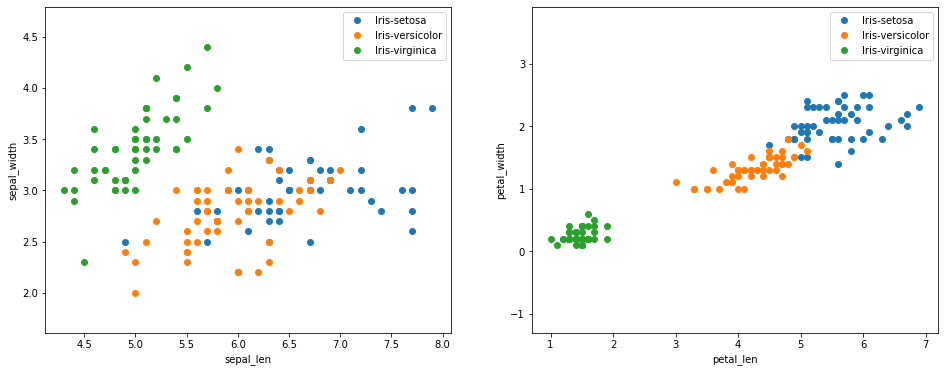

In [6]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    print(target)
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# TODO : Factoriser en fonction

# Create model
model1 = Sequential(name="model_1")
for i in range(1):
    model1.add(Dense(8, input_dim=n_features, activation='relu'))
model1.add(Dense(n_classes, activation='softmax'))

# Compile model
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Create model
model2 = Sequential(name="model_2")
for i in range(2):
    model2.add(Dense(8, input_dim=n_features, activation='relu'))
model2.add(Dense(n_classes, activation='softmax'))

# Compile model
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Create model
model3 = Sequential(name="model_3")
for i in range(3):
    model3.add(Dense(8, input_dim=n_features, activation='relu'))
model3.add(Dense(n_classes, activation='softmax'))

# Compile model
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

models = [model1, model2, model3]

for model in models:
    model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-tr

In [8]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for model in models:
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Test loss: 0.38310959935188293
Test accuracy: 0.8399999737739563
Model name: model_2
Test loss: 0.24489018321037292
Test accuracy: 0.9200000166893005
Model name: model_3
Test loss: 0.19724899530410767
Test accuracy: 0.9200000166893005


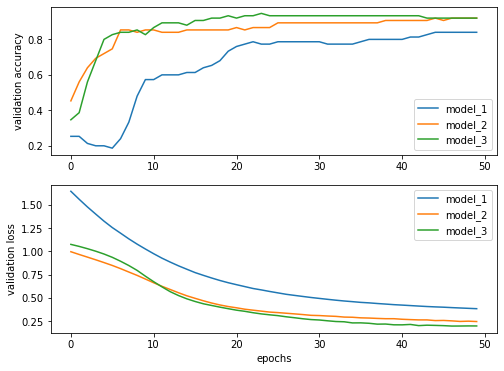

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

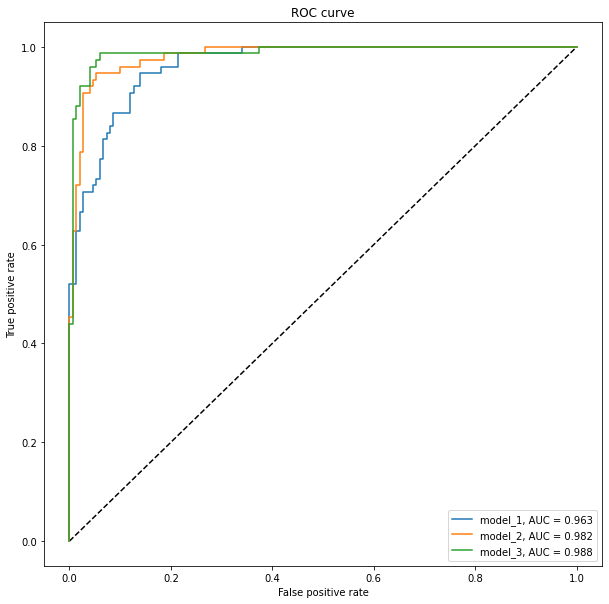

In [10]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();